In [7]:
import numpy as np
import obspy
from obspy.clients.fdsn import Client
# https://docs.obspy.org/packages/obspy.clients.fdsn.html#module-obspy.clients.fdsn
from obspy.core import UTCDateTime
# https://docs.obspy.org/tutorial/code_snippets/utc_date_time.html

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# READ THIS FROM INFOPICKLE... 

In [8]:


# use obspy to get stations in a time and space window 
# and then plot them... 
# https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_stations.html?highlight=client.get_stations#obspy.clients.fdsn.client.Client.get_stations

# stations come from network HV (IRIS)
# https://doi.org/10.7914/SN/HV

client = Client("IRIS")
starttime = UTCDateTime("2018-04-01")
endtime = UTCDateTime("2018-08-01")
minlat = 19.2
maxlat = 19.6
minlon = -155.5
maxlon = -154.9

inventory = client.get_stations(network="HV", station="*",starttime=starttime,endtime=endtime,
                               minlatitude=minlat,maxlatitude=maxlat, minlongitude=minlon,maxlongitude=maxlon)


codes = []
lats = []
lons = []
for i in range(len(inventory[0])):
    code = inventory[0][i].code
    lat = inventory[0][i].latitude
    lon = inventory[0][i].longitude
    codes.append(code)
    lats.append(lat)
    lons.append(lon)
    

#print(inventory[0][1].code)
print(codes)
print(lats)


['AHUD', 'AIND', 'BYL', 'CPKD', 'DDHD', 'DESD', 'DEVL', 'ESR', 'FKSS', 'HAPU', 'HAT', 'HBOP', 'HFA', 'HLPD', 'HMLE', 'HPP', 'HSAN', 'HTCD', 'HVGC', 'JCUZ', 'JOKA', 'KAED', 'KKO', 'KLUD', 'KNHD', 'KUPD', 'MITD', 'MLOD', 'MOTT', 'NAHU', 'NPOC', 'NPT', 'OBL', 'OTLD', 'PAUD', 'PLAD', 'POLD', 'PUHI', 'Q169', 'RIMD', 'RSDD', 'SBL', 'SDH', 'STC', 'STCD', 'UWB', 'UWE', 'WALE', 'WOOD', 'WRM']
[19.371567, 19.372066, 19.412086, 19.391443, 19.387861, 19.333395, 19.373568, 19.4083, 19.493654, 19.415663, 19.423037, 19.463648, 19.495359, 19.296253, 19.425621, 19.585501, 19.444155, 19.237503, 19.43821, 19.384045, 19.433613, 19.285864, 19.398243, 19.455729, 19.379448, 19.402437, 19.335661, 19.493172, 19.504377, 19.4151, 19.39296, 19.412033, 19.417662, 19.386532, 19.373785, 19.529823, 19.281231, 19.385509, 19.4238, 19.395369, 19.460171, 19.427078, 19.390003, 19.384859, 19.384859, 19.424761, 19.420973, 19.4946, 19.248379, 19.406624]


In [10]:
#fig = plt.figure(figsize=[12,9])
#inventory.plot(projection="local",figsize=[7,5])

In [11]:
station_data = pd.DataFrame({'sta_code' : codes, 'lat':lats, 'lon':lons})
station_data.to_pickle('./kilauea18_station_data.pkl')

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
from cartopy.io.img_tiles import GoogleTiles
import cartopy.crs as ccrs

In [114]:
# THE BOUNDS FOR THE TWO MAPS ! 
#path2quake = '../projects/catalog_movies/quakes/kilauea_2018/'
path2quake = './data_2018eruption/'

halemaumau_lola = [-155.2864,19.4100]
# location from web: 19.4100° N, 155.2864° W

#print(type(halemaumau_lola))
#print(halemaumau_lola)

fieldofview=2
# 1 = Big view, 2 = Zoom in 

if fieldofview==1:
    print('BIG VIEW')
    mapfilename = 'map_stations_bigview.png'

    # big kilauea basemap
    trimLat = 0.0
    trimLon = 0.0
    lat_top= 19.546833-trimLat
    lat_bot= 19.1783333+trimLat
    lon_left= -155.4889984+trimLon
    lon_right= -154.7991667-trimLon
    print(lat_top,lat_bot,lon_right,lon_left)
    # speaker geometry !
    nujLon = 0.01
    nujLat = 0.01
    
    pkl2_name = 'spkrs2_big.pkl'
    pkl4_name = 'spkrs4_big.pkl'

if fieldofview==2:
    # kilauea crater zoom 1 basemap
    print('ZOOM')
    mapfilename = 'map_stations_Zoom.png'
    
    # Leif's DEM: [-155.3270365580801, -155.18426605913993, 19.340964975838336, 19.480021344260628]
    trimLat = 0.025
    trimLon = 0.02
    lat_top= 19.480021344260628-trimLat # 19.4821
    lat_bot= 19.340964975838336+trimLat # 19.3241
    lon_left= -155.3270365580801 # -155.37746
    lon_right= -155.18426605913993-trimLon # -155.17215
    print(lat_top,lat_bot,lon_right,lon_left)
    # speaker geometry !
    nujLon = 0.005
    nujLat = 0.005
    
    pkl2_name = 'spkrs2_zoom.pkl'
    pkl4_name = 'spkrs4_zoom.pkl'

dx = lon_right - lon_left
dy = lat_top - lat_bot


# ADD THIS TO INFOPICKLE... 

lats4 = [lat_top-nujLat,lat_top-nujLat,lat_bot+nujLat,lat_bot+nujLat]
lons4 = [lon_left+nujLon,lon_right-nujLon,lon_right-nujLon,lon_left+nujLon]
names4 = ['sp1','sp2','sp3','sp4']
spkrs4 = pd.DataFrame({'name':names4,'lon':lons4,'lat':lats4})
spkrs4.to_pickle('./'+pkl4_name)

lats2 = [(lat_top-lat_bot)/2+lat_bot,(lat_top-lat_bot)/2+lat_bot]
lons2 = [lon_left+nujLon,lon_right-nujLon]
names2 = ['sp1_L','sp2_R']
spkrs2 = pd.DataFrame({'name':names2,'lon':lons2,'lat':lats2})
spkrs2.to_pickle('./'+pkl2_name)


print(spkrs4.lat,spkrs4.lon)

ZOOM
19.45502134426063 19.365964975838335 -155.20426605913994 -155.3270365580801
0    19.450021
1    19.450021
2    19.370965
3    19.370965
Name: lat, dtype: float64 0   -155.322037
1   -155.209266
2   -155.209266
3   -155.322037
Name: lon, dtype: float64


In [115]:
class ShadedReliefESRI(GoogleTiles):
    # shaded relief
    def _image_url(self, tile):
        x, y, z = tile
        url = ('https://server.arcgisonline.com/ArcGIS/rest/services/' \
               'World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg').format(z=z, y=y, x=x)
        return url

In [116]:
bmap = ShadedReliefESRI()
print(type(bmap))

<class '__main__.ShadedReliefESRI'>


[-155.2864, 19.41]


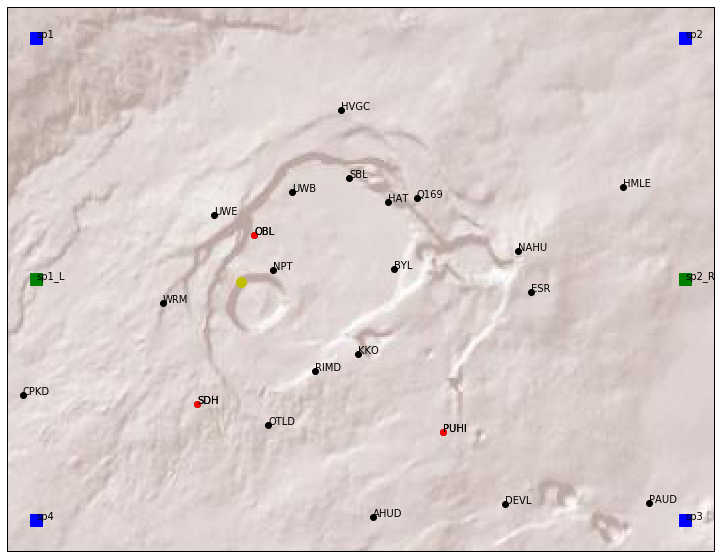

In [117]:
fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection=ShadedReliefESRI().crs)
ax.set_extent([lon_left, lon_right, lat_bot, lat_top],crs=ccrs.Geodetic())
ax.add_image(bmap, 12) #12 is good, 8 is quick low res

if fieldofview==1:
    use_these = ['OBL','SDH','MLOD','STCD']
if fieldofview==2:
    use_these = ['OBL','SDH','PUHI']
    
print(halemaumau_lola)
lo = np.float(halemaumau_lola[0])
la = np.float(halemaumau_lola[1])
ax.plot(lo,la,'yo',markersize=10,transform=ccrs.Geodetic())

for i_sta in range(len(station_data)):
    la = np.float(station_data.lat.iloc[i_sta])
    lo = np.float(station_data.lon.iloc[i_sta])
    if la<lat_top and la>lat_bot and lo>lon_left and lo<lon_right:
        ax.plot(lo,la,'ko',transform=ccrs.Geodetic()) 
        ax.text(lo,la,station_data.sta_code.iloc[i_sta],transform=ccrs.Geodetic())
    
    for i in range(len(use_these)):
        if station_data.sta_code.iloc[i_sta]==use_these[i]:
            #print(station_data.lat.iloc[i_sta])
            #print(station_data.lon.iloc[i_sta])
            la = np.float(station_data.lat.iloc[i_sta])
            lo = np.float(station_data.lon.iloc[i_sta])
            ax.plot(lo,la,'ro',transform=ccrs.Geodetic()) 
            ax.text(lo,la,use_these[i],transform=ccrs.Geodetic())
        
## AARRGGG ITS LON, LAT !! DUGGHHH
for i in range(len(spkrs4)):
    la = np.float(spkrs4.lat.iloc[i])
    lo = np.float(spkrs4.lon.iloc[i])
    ax.plot(lo,la,'bs',markersize=12,transform=ccrs.Geodetic()) 
    ax.text(lo,la,spkrs4.name.iloc[i],transform=ccrs.Geodetic())
    
for i in range(len(spkrs2)):
    la = np.float(spkrs2.lat.iloc[i])
    lo = np.float(spkrs2.lon.iloc[i])
    ax.plot(lo,la,'gs',markersize=12,transform=ccrs.Geodetic()) 
    ax.text(lo,la,spkrs2.name.iloc[i],transform=ccrs.Geodetic())



fig.savefig(mapfilename)